# Word embeddings using gensim

<a target="_blank" href="https://colab.research.google.com/github/JaTaSn/jts-TATA24/blob/main/Kod/wordembeddings.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Loading the model

In [16]:
# first install gensim e.g. via "mamba install gensim"
# or "pip install gensim"
# similarly for numpy and matplotlib

In [1]:
import numpy as np
import math
import gensim.downloader as api
import matplotlib.pyplot as plt

In [2]:
# load dataset/model 
# see https://github.com/piskvorky/gensim-data
# for choice of model
embedd = api.load('glove-wiki-gigaword-50')
# embedd = api.load('glove-twitter-25')
# embedd = api.load('word2vec-google-news-300')

In [3]:
def restrict_embedd(w2v, restricted_word_set=[], min_word_length=2, max_word_length=10):
    new_index_to_key = []
    new_key_to_index = {}
    new_vectors = []
    for ind, word in enumerate(w2v.index_to_key):
        if (not word in restricted_word_set) and len(word) >= min_word_length and len(word) <= max_word_length:
            new_key_to_index[word] = len(new_index_to_key)
            new_index_to_key.append(word)
            new_vectors.append(w2v.vectors[ind])
    w2v.index_to_key = new_index_to_key
    w2v.key_to_index = new_key_to_index
    w2v.vectors = np.array(new_vectors)


badwords = ["'s", "''", "``", "--", "n't", "u.s.", "ii", "(970)"]
restrict_embedd(embedd, restricted_word_set=badwords)            

In [4]:
# most common words

NWORDS=len(embedd)
N = 200
print(f'The database contains (after pruning) {NWORDS} words.')
print(f'The {N} most common ones are: \n')
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    print(f"word #{index}/{len(embedd.index_to_key)} is {word}")


The database contains (after pruning) 350793 words.
The 200 most common ones are: 

word #0/350793 is the
word #1/350793 is of
word #2/350793 is to
word #3/350793 is and
word #4/350793 is in
word #5/350793 is for
word #6/350793 is that
word #7/350793 is on
word #8/350793 is is
word #9/350793 is was
word #10/350793 is said
word #11/350793 is with
word #12/350793 is he
word #13/350793 is as
word #14/350793 is it
word #15/350793 is by
word #16/350793 is at
word #17/350793 is from
word #18/350793 is his
word #19/350793 is an
word #20/350793 is be
word #21/350793 is has
word #22/350793 is are
word #23/350793 is have
word #24/350793 is but
word #25/350793 is were
word #26/350793 is not
word #27/350793 is this
word #28/350793 is who
word #29/350793 is they
word #30/350793 is had
word #31/350793 is which
word #32/350793 is will
word #33/350793 is their
word #34/350793 is or
word #35/350793 is its
word #36/350793 is one
word #37/350793 is after
word #38/350793 is new
word #39/350793 is been
wor

## Cosine similarity, most similar words

In [28]:
# look at some vectors

In [5]:
king = embedd['king']; king

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [6]:
queen = embedd['queen']; queen

array([ 0.37854  ,  1.8233   , -1.2648   , -0.1043   ,  0.35829  ,
        0.60029  , -0.17538  ,  0.83767  , -0.056798 , -0.75795  ,
        0.22681  ,  0.98587  ,  0.60587  , -0.31419  ,  0.28877  ,
        0.56013  , -0.77456  ,  0.071421 , -0.5741   ,  0.21342  ,
        0.57674  ,  0.3868   , -0.12574  ,  0.28012  ,  0.28135  ,
       -1.8053   , -1.0421   , -0.19255  , -0.55375  , -0.054526 ,
        1.5574   ,  0.39296  , -0.2475   ,  0.34251  ,  0.45365  ,
        0.16237  ,  0.52464  , -0.070272 , -0.83744  , -1.0326   ,
        0.45946  ,  0.25302  , -0.17837  , -0.73398  , -0.20025  ,
        0.2347   , -0.56095  , -2.2839   ,  0.0092753, -0.60284  ],
      dtype=float32)

In [7]:
# What is most similar to king?
embedd.most_similar(positive=['king'])

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253692626953),
 ('grandson', 0.7404318451881409)]

In [8]:
# What is the female counterpart of a king?
embedd.most_similar(positive=['king', 'woman'], 
                             negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [9]:
# What is the female counterpart of a king?
embedd.most_similar(positive=['king', 'she'], 
                             negative=['he'])

[('queen', 0.7633836269378662),
 ('princess', 0.6342118382453918),
 ('queens', 0.5744965076446533),
 ('monarch', 0.5577755570411682),
 ('goddess', 0.5278830528259277),
 ('princesses', 0.5202734470367432),
 ('empress', 0.5119601488113403),
 ('queendom', 0.5091063380241394),
 ('Queen_Bee', 0.4829074442386627),
 ('prince', 0.47732123732566833)]

In [9]:
# When we think of a female doctor, we think also of
embedd.most_similar(positive=['doctor', 'she'], 
                             negative=['he'])

[('nurse', 0.8434410095214844),
 ('mother', 0.7978049516677856),
 ('child', 0.7920326590538025),
 ('woman', 0.7831878066062927),
 ('pregnant', 0.7726936936378479),
 ('girl', 0.7672077417373657),
 ('her', 0.7481821775436401),
 ('patient', 0.7464373707771301),
 ('boy', 0.7313278913497925),
 ('learns', 0.7268911600112915)]

In [10]:
# Cosine similarity: measures cosine of angle between vectors, scale invariant, (-1,1)
# Ortogonal projection length: project onto second vector, measure length, depends on length of first vector, in R
def cos_sim(u, v):
    return np.inner(u,v)/math.sqrt(np.inner(u,u)*np.inner(v,v))

def ort_proj_len(u, v):
    return np.inner(u,v)/math.sqrt(np.inner(v,v))

In [11]:
# project on this axis for gender bias
he = embedd['he']; she = embedd['she'] ; gbias = he - she; gbias

array([-0.261302  , -0.438481  ,  0.13376004, -0.12281001, -0.00838   ,
       -0.64455   , -0.13150996, -0.01198   , -0.73557   ,  0.04754001,
        0.04260999,  0.23386998, -0.56951   , -0.24359   , -0.29471004,
       -0.152461  ,  0.44637996, -0.08563   , -0.66735   ,  0.20257801,
       -0.28133   , -0.71557   , -0.04014999, -0.42204   , -0.63574   ,
       -0.11930013,  0.429694  , -0.216301  , -0.08826   ,  0.5115    ,
        0.28599977, -0.227249  , -0.25811   , -0.18074998,  0.22733   ,
        0.15184401,  0.13196   ,  0.14411998, -0.01708999,  0.62810004,
       -0.124465  ,  0.16902   , -0.62446666,  0.53734   , -0.379254  ,
        0.3373    , -0.38487598,  0.92383   ,  0.019064  , -0.435641  ],
      dtype=float32)

In [12]:
doctor = embedd['doctor']
sim = embedd.most_similar(positive=['doctor'], 
                             negative=[])
print(sim)
print()
for li in sim:
    word = li[0]
    w = embedd[word]
    print(f'{word} \t  {cos_sim(w,doctor)} \t {ort_proj_len(w,doctor)}')

[('nurse', 0.7977497577667236), ('physician', 0.7965211272239685), ('patient', 0.7611691951751709), ('child', 0.7558937668800354), ('teacher', 0.7538284063339233), ('surgeon', 0.747907280921936), ('doctors', 0.7393609285354614), ('father', 0.733410656452179), ('mother', 0.728441059589386), ('she', 0.7281814813613892)]

nurse 	  0.7977496777647489 	 3.932998734675048
physician 	  0.7965211591055051 	 3.8012398775600005
patient 	  0.7611691340228203 	 3.9118394412561894
child 	  0.755893738561101 	 4.093095861741297
teacher 	  0.7538283512557397 	 3.8555700950495093
surgeon 	  0.7479071795905597 	 3.7487204469351427
doctors 	  0.7393607058950945 	 4.131572749126903
father 	  0.7334106401611019 	 3.894606241780341
mother 	  0.7284410435938768 	 4.107167184668689
she 	  0.7281813557181285 	 4.110411122219817


## Genderdness for words

In [13]:
def genderness(word):
    return cos_sim(embedd[word], embedd['he'] - embedd['she'])

def gend_op(word):
    return ort_proj_len(embedd[word], embedd['he'] - embedd['she'])

In [14]:
[(genderness(_), gend_op(_)) for _ in ['he', 'man', 'king', 'beard']]

[(0.17669018921772683, 0.9661949630816717),
 (-0.0759546247262612, -0.39834324183723074),
 (0.11793255256397168, 0.633826275373558),
 (-0.11279480255299033, -0.5335970906869317)]

In [15]:
[(genderness(_), gend_op(_)) for _ in ['she', 'woman', 'queen', 'pink']]

[(-0.3014023502580305, -1.70134480843387),
 (-0.4019534575008965, -2.240915681386716),
 (-0.3114308307117062, -1.6171853326590253),
 (-0.30173915446792415, -1.5756604515556956)]

In [16]:
N = 5
glist = [ (word, genderness(word), gend_op(word)) for index, word in enumerate(embedd.index_to_key)]
glist[:N]

[('the', 0.2157683615819542, 1.071899917469624),
 ('of', 0.1376989176026331, 0.6824493102543815),
 ('to', 0.12531179022375147, 0.6211543492427153),
 ('and', 0.05365547233778015, 0.25033912729946134),
 ('in', 0.1617873422279208, 0.8068612414549244)]

In [17]:
sglist = sorted(glist, key=lambda foo: foo[1])
sg_op_list = sorted(glist, key=lambda foo: foo[2])

In [18]:
# most female words
N = 50
sglist[:N]


[('mulleavy', -0.7006985315544474, -4.042454504380837),
 ('mandrell', -0.675704004621733, -3.4346875497864673),
 ('monheit', -0.668710296489365, -3.083038125097354),
 ('mehretu', -0.6631638297738612, -3.0873904617529884),
 ('wiedlin', -0.648022452907506, -3.248100510637829),
 ('streb', -0.6446613680196839, -2.7269089111472393),
 ('medrich', -0.6427991526776876, -3.2979561087404683),
 ('mcgarrigle', -0.6426385625417351, -3.7111149115522397),
 ('herdahl', -0.6382342004626715, -2.3974880788600252),
 ('fozzard', -0.6321265907192541, -3.1869675914028317),
 ('miscarries', -0.6317290736688587, -2.629320614158419),
 ('pavlova', -0.6313723975012049, -2.6285374867192726),
 ('arkhipova', -0.6232624127449452, -2.4236637694093317),
 ('schorpen', -0.6220365711602908, -2.695603834186999),
 ('kuppinger', -0.6218319863919527, -3.240502333297415),
 ('voluptuous', -0.6156876496819695, -2.348231132616254),
 ('lactating', -0.6144926237812198, -3.3288250225070275),
 ('siberry', -0.6115365967594316, -2.76498

In [19]:
# sort after ortproj
sg_op_list[:N]

[('popmusic', -0.49510414559170357, -4.06915233947471),
 ('mulleavy', -0.7006985315544474, -4.042454504380837),
 ('lebling', -0.40524530761444155, -3.9547574590965864),
 ('wangsness', -0.5331704095035583, -3.945639503283764),
 ('nipps', -0.5046506120294154, -3.773189514272611),
 ('pitzl', -0.5752142347926938, -3.730396542310276),
 ('mcgarrigle', -0.6426385625417351, -3.7111149115522397),
 ('cartner', -0.5119706899800055, -3.6621312823261487),
 ('kudwa', -0.5552813606774721, -3.574500019031765),
 ('quindlen', -0.598297967306908, -3.5624426093021837),
 ('gazeau', -0.34745484134384186, -3.5401875611000118),
 ('hollaback', -0.6072176443341113, -3.470551962163934),
 ('snout-vent', -0.5044823515312432, -3.450909960504889),
 ('baraboo', -0.5092661497118751, -3.450586055706959),
 ('bonesetter', -0.5160993686138489, -3.4423629494628116),
 ('udwin', -0.4850732203915637, -3.4360335780030327),
 ('vys', -0.4087709693055667, -3.4355384255249604),
 ('mandrell', -0.675704004621733, -3.4346875497864673

In [20]:
# male words
sglist[-N:]

[('ayyubids', 0.4823288988402379, 1.9198704337060302),
 ('admirals', 0.48320431063103975, 2.063504872313662),
 ('defensive', 0.4837984833926378, 2.7490318591034564),
 ('chargers', 0.4844255181893741, 2.4928510497840355),
 ('keynes', 0.48443885465292086, 2.0768823907257583),
 ('league', 0.4851302807257394, 2.97637870621241),
 ('nl', 0.4861177658894251, 2.559324108055111),
 ('redskins', 0.48769608553607346, 2.4707313194251492),
 ('browns', 0.4885224557680987, 2.305908466130384),
 ('pompey', 0.4891323664452952, 2.0699938723521125),
 ('brees', 0.4902826120715378, 2.485959135057652),
 ('ejection', 0.4911356569067291, 2.058106459014822),
 ('abbasid', 0.4918407779855409, 2.811424646448726),
 ('no-hitter', 0.49218792633904046, 2.6747134047637453),
 ('pistons', 0.4945292220069899, 2.7264353880734435),
 ('rra', 0.494752608599718, 2.2969034837349414),
 ('pacers', 0.49674789571110894, 2.6369854672657356),
 ('bengals', 0.49674970854430833, 2.4337882969203584),
 ('putsch', 0.5009630163318942, 2.4817

In [21]:
# even manlier words?
sg_op_list[-N:]

[('cgt', 0.4789646647673948, 2.784394505052782),
 ('lokendra', 0.3884209228496844, 2.7873237699113282),
 ('decimal', 0.47035914243798155, 2.7941431099423695),
 ('taiex', 0.3281435591163271, 2.7973776890364923),
 ('tilove', 0.26415898256850967, 2.802440399680524),
 ('abbasid', 0.4918407779855409, 2.811424646448726),
 ('sacked', 0.6105438352971417, 2.815554611377746),
 ('touchdown', 0.42783625708153167, 2.8224896061572755),
 ('sonthi', 0.4505792983576386, 2.8293007234395837),
 ('20-team', 0.3984439541073509, 2.8340239775652543),
 ('156-man', 0.4535731545759642, 2.8385931445298787),
 ('hossam', 0.45340427528236876, 2.847095824230959),
 ('bluechips', 0.4015661991305499, 2.850235305448427),
 ('sahk', 0.299412450140398, 2.872084221365335),
 ('all-seater', 0.4697422245000497, 2.8779486500108664),
 ('td', 0.47119263111271936, 2.899922694712847),
 ('brevetted', 0.4193986377544191, 2.9041962002338857),
 ('radislav', 0.40627156202060133, 2.915046832209147),
 ('teachta', 0.34627564860265403, 2.924

## Correlation between word length and genderness

In [22]:
#correlation length of words, frequency of words to gender bias
N = len(embedd)
 
x1 = []
x2 = []
y1 = []
y2 = []
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    s= embedd[word]
    wfreq = embedd.get_vecattr(word, "count")/NWORDS  # returns count of "my-word"
    wlen = len(word)
    x1.append(wlen)
    x2.append(wfreq)
    cossim = genderness(word)
    ortprojlen = gend_op(word)
    y1.append(cossim)
    y2.append(ortprojlen)



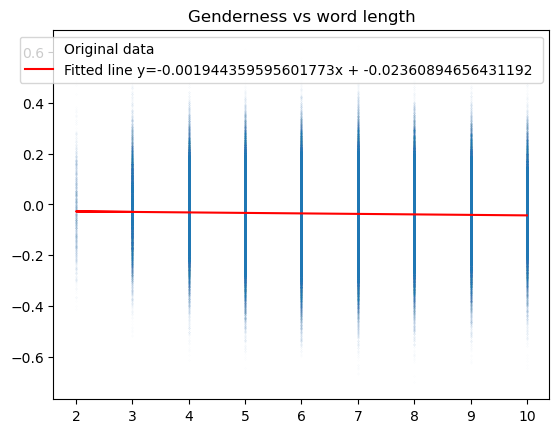

In [23]:
x=np.array(x1)
y=np.array(y1)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness vs word length')
_ = plt.legend()
plt.show()

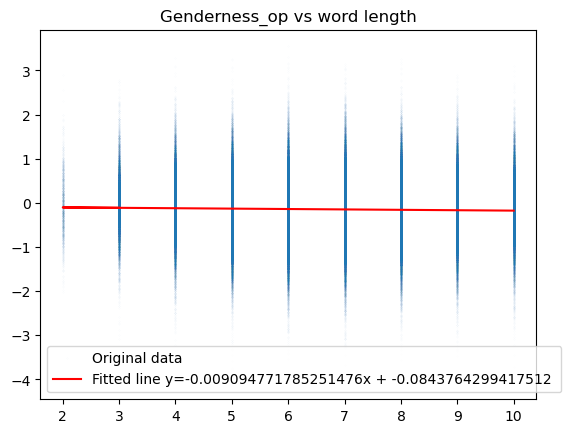

In [24]:
x=np.array(x1)
y=np.array(y2)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness_op vs word length')
_ = plt.legend()
plt.show()

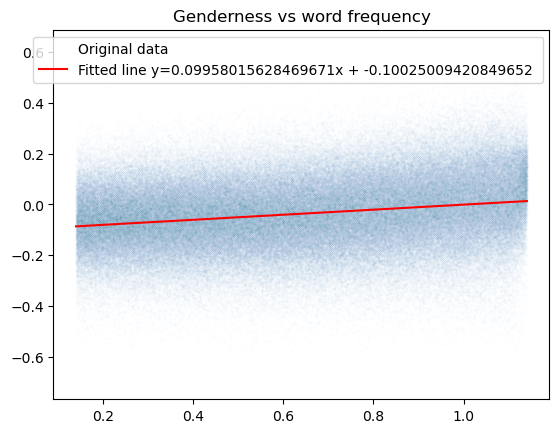

In [25]:
x=np.array(x2)
y=np.array(y1)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness vs word frequency')
_ = plt.legend()
plt.show()



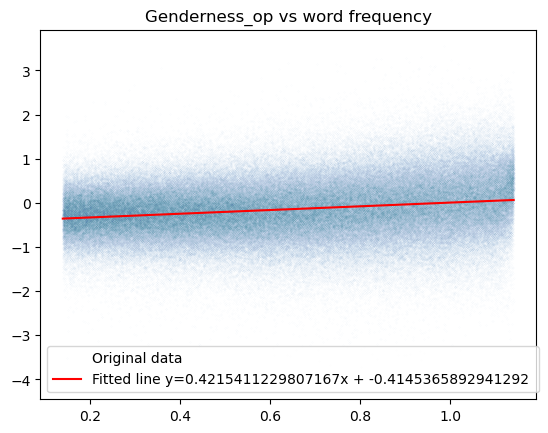

In [26]:
x=np.array(x2)
y=np.array(y2)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness_op vs word frequency')
_ = plt.legend()
plt.show()


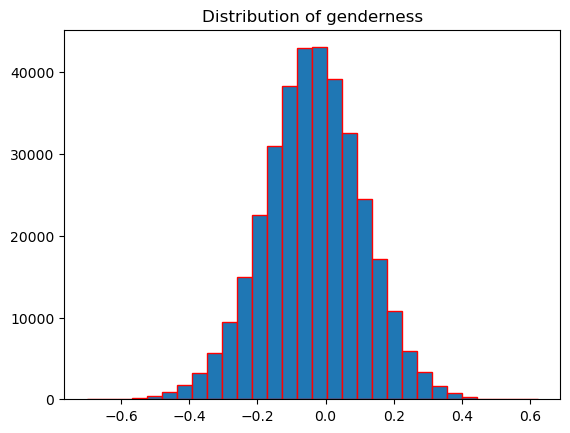

In [27]:
import matplotlib.pyplot as plt 
plt.hist(y1, edgecolor="red", bins=30) 
plt.title('Distribution of genderness')
plt.show() 

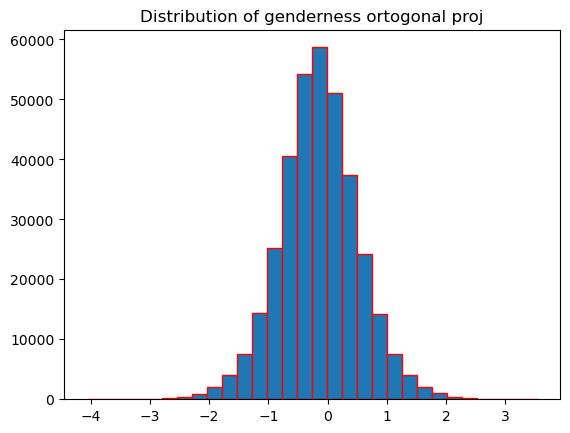

In [28]:
import matplotlib.pyplot as plt 
plt.hist(y2, edgecolor="red", bins=30) 
plt.title('Distribution of genderness ortogonal proj')
plt.show() 